In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import cv2
from PIL import Image 

In [3]:
path = os.path.join(os.getcwd(), 'data')
path

'd:\\New Things\\traffic-signs\\data'

In [5]:
test = pd.read_csv('data/Test.csv')
train = pd.read_csv('data/Train.csv')
meta = pd.read_csv('data/Meta.csv')

In [6]:
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [26]:
meta.sort_values(by=['ClassId'], inplace=True)

Total number of classes:  43


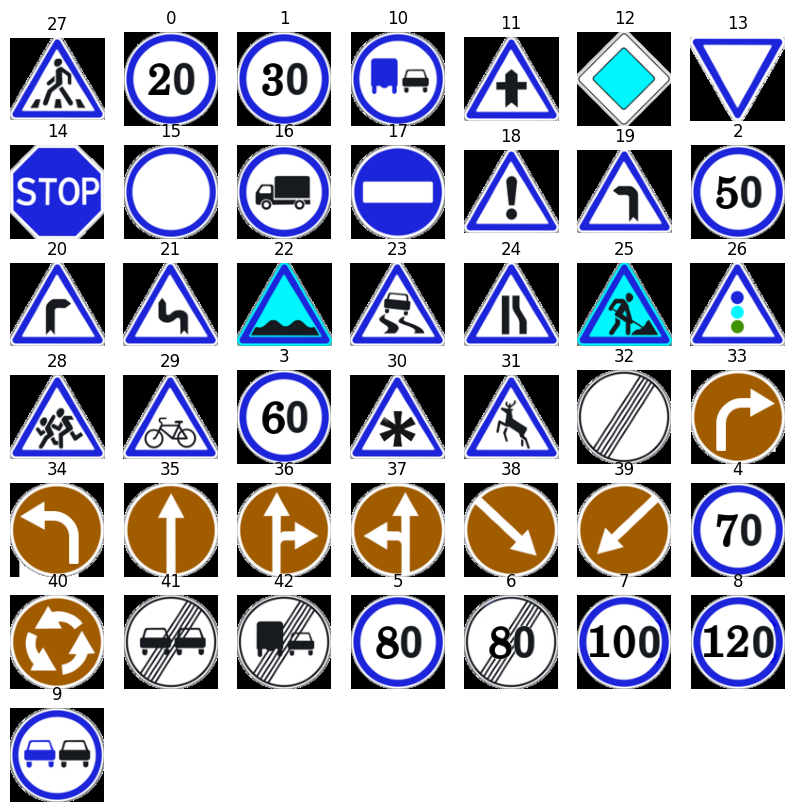

In [27]:
plt.figure(figsize=(10, 10))
print('Total number of classes: ', len(meta['ClassId']))
for i in range(len(meta['Path'])):
    plt.subplot(7, 7, i+1)
    plt.title(meta['ClassId'][i])
    plt.axis('off')
    plt.imshow(cv2.imread(os.path.join(path, meta['Path'][i])))
plt.show()

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


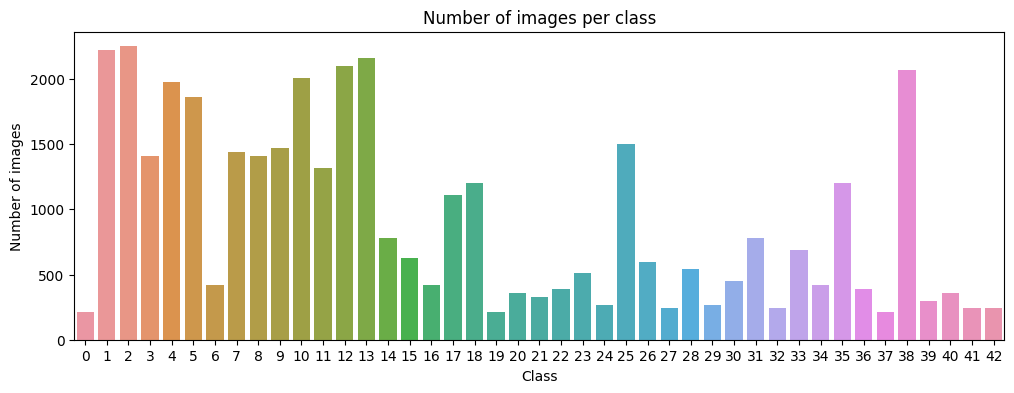

In [34]:
classes_info = train["ClassId"].value_counts()
plt.figure(figsize=(12, 4))
sns.barplot(x=classes_info.index, y=classes_info.values)
plt.title("Number of images per class")
plt.ylabel("Number of images")
plt.xlabel("Class")
plt.show()


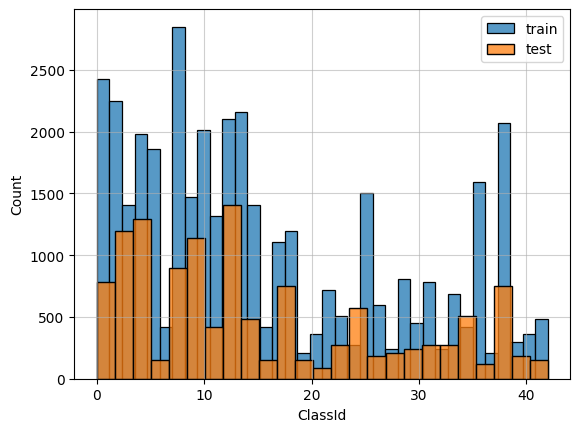

In [35]:
sns.histplot(train["ClassId"],label="train")
sns.histplot(test["ClassId"],label="test")
plt.grid(alpha=.6)
plt.legend()

<Axes: title={'center': 'ClassID Frequency In Test Set'}, xlabel='ClassId'>

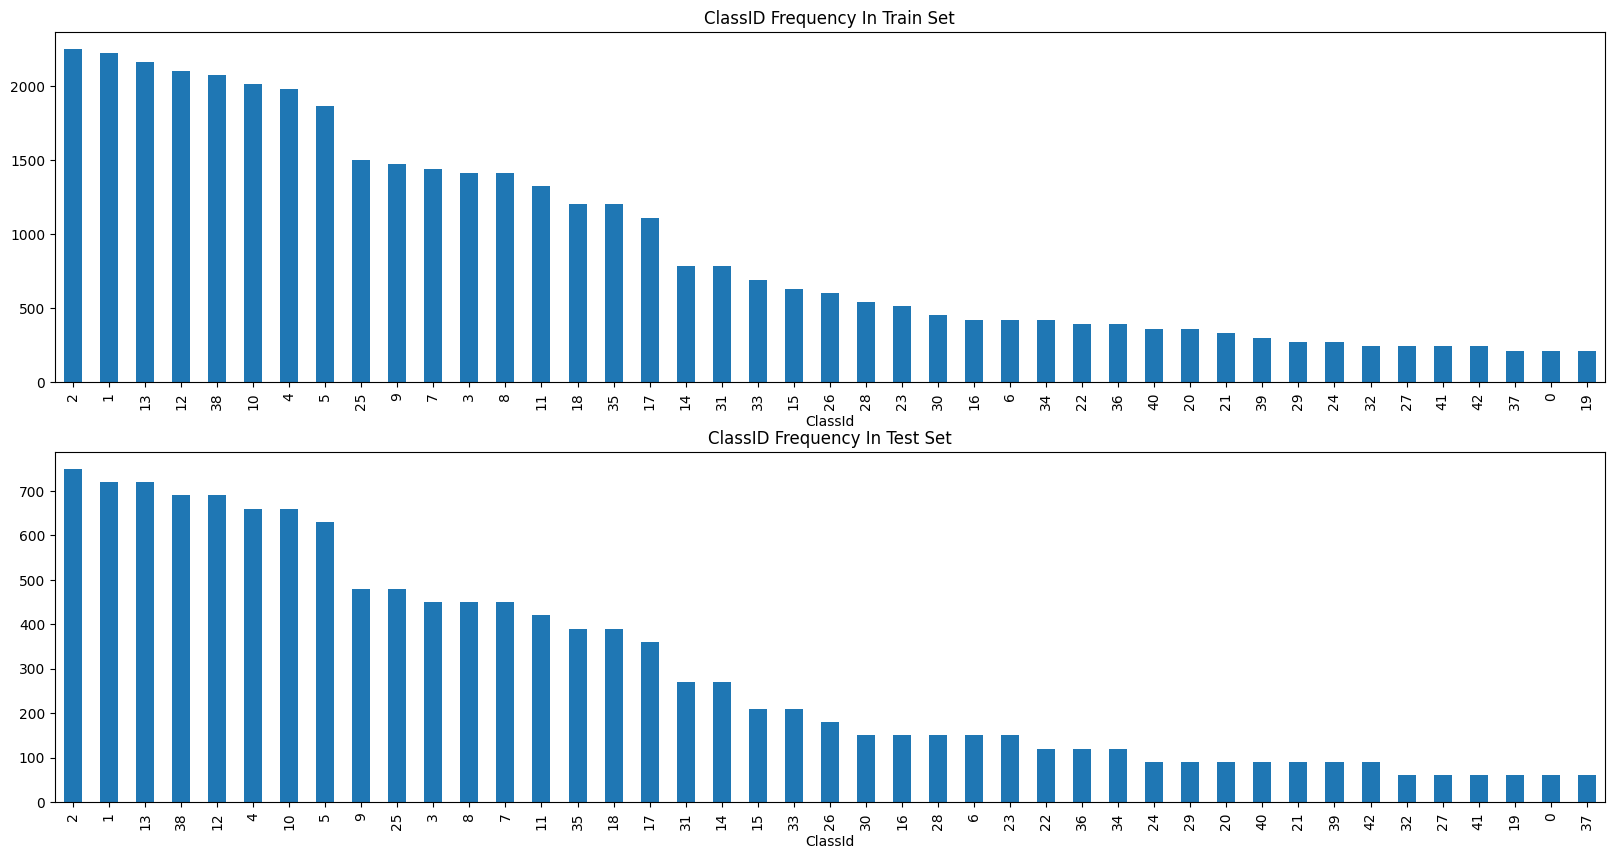

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(211)
train["ClassId"].value_counts().plot(kind="bar",title="ClassID Frequency In Train Set")

plt.subplot(212)
test["ClassId"].value_counts().plot(kind="bar",title="ClassID Frequency In Test Set")